In [ ]:
#This program is created on 26-06-21 at 18:45. This program 
#THIS CODE IS WORKING
import pyroomacoustics as pra
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import soundfile as sf
from scipy.io import wavfile
import IPython
from streamlit import caching
caching.clear_cache()


Lg_t = 0.100                # filter size in seconds
fs=16000
Lg = np.ceil(Lg_t*fs)       # in samples
fft_len=512

#Create a 4 by 6 metres shoebox room
room_bf=pra.ShoeBox([16,16], fs=fs, max_order=12)
room_bf.plot()

#phi=0
#d=0.5

phi = 0
d = 0.6

N=2
M=5

def unit_vec2D(phi):
    return np.array([[np.cos(phi), np.sin(phi)]]).T
def linear_2D_array(center, M, phi, d):
    u = unit_vec2D(phi)

    return (np.array(center)[:,np.newaxis] + d * (np.arange(M)[np.newaxis,:] - (M - 1.0) / 2.0) * u)
S1=np.zeros([2,M], dtype=float)   #This line is initialized with zero and another line 'R1 = linear_2D_array([y, x], M, phi, d)' used for only making horizontal linear array to vertical linear array and hence

Number_source=2

signallength=0
for j in range(Number_source):
        if(j == 0):
            m=1     #5
            n=4.5   #5
            signalname = 'signal'
        else:
            m=3.5   #8
            n=3     #10
            signalname = 'noise1'

        if(signalname=='signal'):
            filename='arctic_a0010.wav'
            #signallength=len(signal)
            signal, fs1 = sf.read('C:/Users/Suresh/anaconda3/envs/'+str(filename))
            if(signal.ndim==2):                      #Check for 1d array or 2d array. If the signal is 2d then convert it into 1d signal.
                signal=signal.flatten()
            #room.add_source(np.array([m, n]), signal=signal)  #This line adds one source with corresponding original signal whose xy coordinate value is defined.
            room_bf.add_source(np.array([m, n]), delay=0, signal=signal)            
        elif(signalname=='noise1'):
            filename='whatMovies.wav'
            noise1, fn1 = sf.read('C:/Users/Suresh/anaconda3/envs/'+str(filename))
            if(noise1.ndim==2):                      #Check for 1d array or 2d array. If the signal is 2d then convert it into 1d signal.
                noise1=noise1.flatten()
            #room.add_source(np.array([m, n]), signal=noise1[:len(signal)])  #This line adds one source with corresponding noise1 signal whose xy coordinate value is defined.   .
            room_bf.add_source(np.array([m, n]), delay=0.5, signal=noise1[:len(signal)])
        print(len(signal))

print('print the value of dimension of signal \n', signal.ndim)
print('print the value of dimension of signal \n', noise1.ndim)
                   
N=2

#Create a linear array with 5 microphones with angle 0 degree and Inter mic disance of 50cm.
for i in range(N):
       
        #-----------------
        shape1 = "linear"
        if(i == 0):
            center = [3, 5.5]
            radius = 37.5e-3   #[2, 5]
        else:
            center = [2, 5];
            radius = 37.5e-3   #[2, 5]
        if(shape1 == "circular"):
            print("CIRCULAR")
            radius = 137.5e-3   #[2, 5]
            fft_len = 512
            R1 = pra.circular_2D_array(center=center, M=6, phi0=0, radius=radius) 
            #R1 = np.concatenate((R1, np.array(center, ndmin=2).T), axis=1)
            mics = pra.Beamformer(R1, room_bf.fs, N=fft_len, Lg=Lg)
            #room_bf.mic_array = mics  # NEW LINE ADDED TO REMOVE ERRO FOR NO SIGNAL TO BEAMFORM
            RR=room_bf.add_microphone_array(mics)
            #mics.rake_delay_and_sum_weights(room_bf.sources[0][:1],room_bf.sources[1][:1]) 
            mics.rake_delay_and_sum_weights(room_bf.sources[0][0:1],room_bf.sources[1][0:1])
            RR.plot()
            plt.grid()
            plt.plot(signal, color='green', linewidth = 3,  label = 'line1-width-3')
            plt.xlabel('x-coordinate of source & microphone array')
            plt.ylabel('y-coordinate of source & microphone array')
            plt.title('2D Room with dimension 16m x 16m')
        elif(shape1 == "linear"):
            if(i == 0):
                x=3
                y=5.5
                lineartype = 'h'  #H&H wokring, V & V working, V & H best working, H & V not working
            else:
                x=2   #10
                y=5   #14
                lineartype = 'h'
            if(lineartype=='v'):
                print("LINEAR - VERTICAL")
                #radius = 37.5e-3
                R1 = linear_2D_array([y, x], M, phi, d)   #Important Note: Here x and y position are interchanged because we need to plot micophone array direction.
                S1[1,:]=R1[0,:]
                S1[0,:]=R1[1,:]
                R1=S1
                mics = pra.Beamformer(R1, room_bf.fs, N=fft_len, Lg=Lg)
                #R1 = np.concatenate((R1, np.array(center, ndmin=2).T), axis=1)
                RR=room_bf.add_microphone_array(mics)    
                #mics.rake_delay_and_sum_weights(room_bf.sources[0][:1],room_bf.sources[1][:1])
                mics.rake_delay_and_sum_weights(room_bf.sources[0][0:1],room_bf.sources[1][0:1]) #BEAMFORMING WILL WORK WITH THIS
                RR.plot()
                plt.grid()
                plt.plot(signal, color='green', linewidth = 3,  label = 'line1-width-3')
                plt.xlabel('x-coordinate of source & microphone array')
                plt.ylabel('y-coordinate of source & microphone array')
                plt.title('2D Room with dimension 16m x 16m')
            else:
                
                print("LINEAR - HORIZONTAL")
                #radius = 37.5e-3
                R1 = linear_2D_array([x, y],  M, phi, d)
                #R1 = np.concatenate((R1, np.array(center, ndmin=2).T), axis=1)
                mics = pra.Beamformer(R1, room_bf.fs, N=fft_len, Lg=Lg)
                #room_bf.mic_array = mics  # NEW LINE ADDED TO REMOVE ERRO FOR NO SIGNAL TO BEAMFORM
                RR=room_bf.add_microphone_array(mics)
                #mics.rake_delay_and_sum_weights(room_bf.sources[0][:1],room_bf.sources[1][:1]) 
                mics.rake_delay_and_sum_weights(room_bf.sources[0][0:1],room_bf.sources[1][0:1])
                RR.plot()
                plt.grid()
                plt.plot(signal, color='red', linewidth = 3,  label = 'line1-width-3')
                plt.xlabel('x-coordinate of source & microphone array')
                plt.ylabel('y-coordinate of source & microphone array')
                plt.title('2D Room with dimension 16m x 16m')
                
                '''
                print('horizonal')
                R1 = linear_2D_array([x, y], M, phi, d)
                print('Print the value of R1 \n', R1)
                mics = pra.Beamformer(R1, room_bf.fs, N=fft_len, Lg=Lg)
                RR1=room_bf.add_microphone_array(mics)
                mics.rake_delay_and_sum_weights(room_bf.sources[0][0:1],room_bf.sources[1][0:1])
                RR1.plot()
                plt.grid()
                plt.plot(signal, color='red', linewidth = 3,  label = 'line1-width-3')
                plt.xlabel('x-coordinate of source & microphone array')
                plt.ylabel('y-coordinate of source & microphone array')
                plt.title('2D Room with dimension 16m x 16m')'''
        #----------------
        '''
        if(i == 0):
            x=3
            y=5.5
            lineartype = 'v'
            center = [3, 5.5]
        else:
            x=2   #10
            y=5   #14
            lineartype = 'v'
            center = [2, 5];
        #if(lineartype=='v'):
        #lineartype = (input("Enter lineartype: v or h"+str(i)))
        shape1 = "linear"
        if(lineartype=='v'):
            if(shape1 == "circular"):
                radius = 37.5e-3   #[2, 5]
                fft_len = 512
                R1 = pra.circular_2D_array(center=center, M=6, phi0=0, radius=radius) 
                R1 = np.concatenate((R1, np.array(center, ndmin=2).T), axis=1)
            else:
                radius = 37.5e-3
                R1 = pra.linear_2D_array([y, x], M = M, phi=0, d=radius)   #Important Note: Here x and y position are interchanged because we need to plot micophone array direction.
            print(R1)
            S1[1,:]=R1[0,:]
            print(S1)
            S1[0,:]=R1[1,:]
            print(S1)
            R1=S1
            mics = pra.Beamformer(R1, room_bf.fs, N=fft_len, Lg=Lg)
            print(R1)
            #room_bf.mic_array = mics
            RR=room_bf.add_microphone_array(mics)    
            mics.rake_delay_and_sum_weights(room_bf.sources[0][:1],room_bf.sources[1][:1])
        else:
            if(shape1 == "circular"):
                radius = 37.5e-3
                fft_len = 512
                R1 = pra.circular_2D_array(center=center, M=6, phi0=0, radius=radius) 
                R1 = np.concatenate((R1, np.array(center, ndmin=2).T), axis=1)
            else:
                radius = 37.5e-3
                R1 = pra.linear_2D_array([x, y],  M = M+1, phi=0, d=radius)
            mics = pra.Beamformer(R1, room_bf.fs, N=fft_len, Lg=Lg)
            #room_bf.mic_array = mics
            RR=room_bf.add_microphone_array(mics)
            mics.rake_delay_and_sum_weights(room_bf.sources[0][:1],room_bf.sources[1][:1])'''            
           
room_bf.mic_array = mics  # NEW LINE ADDED TO REMOVE ERRO FOR NO SIGNAL TO BEAMFORM

# Now the setup is finished, run the simulation
room_bf.compute_rir()
room_bf.simulate()

# The microphone signal are in the rows of `room.mic_array.signals`
mic_signals = room_bf.mic_array.signals
print('Print the shape of mic_signals \n', np.shape(mic_signals))
plt.figure()
plt.subplot(1,2,1)
plt.plot(np.arange(mic_signals.shape[1]) / fs, mic_signals[0])
plt.title('Microphone 0 signal')
plt.xlabel('Time [s]')
plt.subplot(1,2,2)
plt.plot(np.arange(mic_signals.shape[1]) / fs, mic_signals[1])
plt.title('Microphone 1 signal')
plt.xlabel('Time [s]')
plt.tight_layout()

print(type(mics))

#Extra explanation of above lines is given below: 
print(room_bf.sources[0][:1])     #Gives signal
print(room_bf.sources[1][:1])     #Gives noise1

# assuming the simulation has already been carried out
rt60 = room_bf.simulate()
print("_")
count = 1
for m in room_bf.mic_array.signals:
    #for s in room_bf.sources:
    #print(count)
    #print(m)
    count = count + 1    
    write("example.wav", fs1, room_bf.mic_array.signals)
        #print(
            
            #"RT60 between the {}th mic and {}th source: {:.3f} s".format(m, s, rt60[m, s])
        #)
print("_")

print("Center MicCCCCC:")
IPython.display.Audio(room_bf.mic_array.signals[-1,:], rate=fs)  # -1はcenter mic

: 

In [ ]:
print("Center MicCCCCC:")
IPython.display.Audio(room_bf.mic_array.signals[-6,:], rate=fs)  # -1はcenter mic

Center MicCCCCC:


IndexError: index -6 is out of bounds for axis 0 with size 5

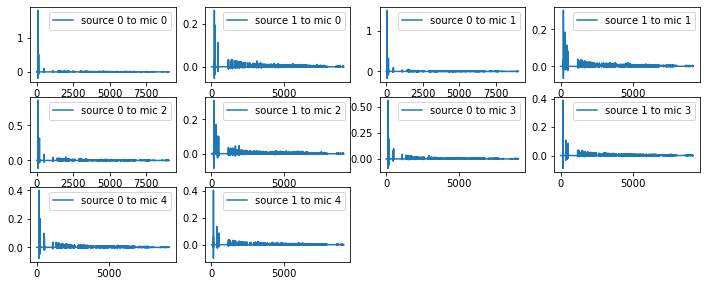

In [ ]:
# room_bf.plot_rir()
fig = plt.figure(1, figsize=(12,8))

for i, rir_s in enumerate(room_bf.rir):      # i = microphone
    for j, rir in enumerate(rir_s):          # j = source
        ax = fig.add_subplot(5, 4, 2*i + j + 1)
        #print(2*i + j + 1)
        ax.plot(rir,label="source {0} to mic {1}".format(j, i))
        ax.legend(loc=0)
        #print(i)


In [ ]:
#print(len(mics.signals))
signal_das = mics.process(FD=False)
print('signal_das = ', signal_das)
print('Shape of signal_das = ', np.shape(signal_das))
print("DAS Beamformed Signal:")
IPython.display.Audio(signal_das, rate=fs)

signal_das =  [-1.13078271e-18 -4.00913870e-18 -3.03255363e-18 ... -5.85951041e-18
 -6.75899665e-18 -1.02798428e-18]
Shape of signal_das =  (67803,)
DAS Beamformed Signal:
